# Numerical Integration of Initial Value Problems

* Numerical integration of initial value problems refers to a computational technique used to approximate the solution of ordinary differential equations (ODEs) or differential algebraic equations (DAEs) with given initial conditions. These problems often arise in various fields, including physics, engineering, biology, and economics, where the behavior of a system is described by a set of differential equations. Initial Value Problem (IVP) involves solving an ODE along with initial conditions. The initial conditions specify the values of the unknown functions at a particular point in the independent variable. Analytical solutions to many ODEs are difficult or impossible to find. Numerical integration methods provide a way to approximate the solution by discretizing the domain and computing the values of the unknown functions at discrete points.

* From Newton’s laws to Schrödinger’s equation: physics is packed with differen-
tial equations. While the majority are partial differential equations, such as Euler’s equations of fluid dynamics, Maxwell’s equations for electromagnetic fields, and Schrödinger’s equation for the wave function in quantum physics, there also are many applications of ordinary differential equations.

# Stroemgren Radius

* The Strömgren radius, named after the Danish astrophysicist Bengt Strömgren, is a characteristic radius that defines the region around a hot, massive star where the star's ultraviolet (UV) radiation ionizes the surrounding interstellar gas. This process leads to the formation of an ionized H II (pronounced "H two") region.

## Concepts:

* Ionization: Massive stars emit intense ultraviolet radiation. When this radiation interacts with the neutral hydrogen (H) in the interstellar medium, it has enough energy to ionize the hydrogen atoms, stripping them of their electrons.
* HII Region: The ionized region created by the UV radiation is called an H II region. In an H II region, the dominant ion is the ionized form of hydrogen, denoted as $H^+$. These regions are characterized by the presence of free electrons and ions.
* Strömgren Sphere: The Strömgren radius defines the boundary of the spherical region around the star within which the ionization by the star's UV radiation is complete. Beyond this radius, the density of ionized hydrogen decreases, and the interstellar gas returns to a neutral state.
* Strömgren Radius Formula: The Strömgren radius $R_{S}$ is determined by the balance between the ionization rate produced by the star and the recombination rate of ionized hydrogen. The formula for the Strömgren radius is given by:
> $R_S = \left( \frac{3Q}{4\pi \alpha n^2} \right)^{1/3}$

  where:

  $Q$: the rate of ionizing photons emitted by the star per second

  $\alpha$: the recombination coefficient (around $3.1 \times 10^{-13} cm^{3}s^{-1}$)

  $n$: the number density of the interstellar hydrogen

  With initial condition:

  > $R_S = \left( \frac{3Q}{4\pi \alpha n_{0}^2} \right)^{1/3}$

* We can apply a linear approximation over a small time interval, in other words, it is assumed that the derivative of $R_S$ changes only little over $\Delta t$ and be approximated by the value at time $t$:
> $\frac{dR_S}{dt} = \frac{1}{3} \left( \frac{3Q}{4\pi \alpha n^2} \right)^{-2/3} \left( \frac{dQ}{dt} - 2\alpha n \frac{dn}{dt} \right)$

  where:

  $\frac{dQ}{dt}$: the rate of change of the ionization rate

  $\frac{dn}{dt}$: the rate of change of the number density

In [1]:
import numpy as np
import astropy.units as unit
import matplotlib.pyplot as plt
plt.style.use("dark_background")
%matplotlib inline

In [2]:
numberOfDensityHI = 5000 * 1/unit.cm**3 # number density of HI
ionizingPhoton = 1.6e49 * 1/unit.s # ionizing photons emitted per second
recombinationCoefficient = 3.1e-13 * unit.cm**3/unit.s # recombination coefficient

In [3]:
stRadius = (3*ionizingPhoton/(4*np.pi*numberOfDensityHI**2*recombinationCoefficient))**(1/3)
print(f"Strmoegren radius: {stRadius.to(unit.pc)}")

Strmoegren radius: 0.25599177502706955 pc


In [4]:
n0cgs = numberOfDensityHI.value
alphacgs = recombinationCoefficient.value
rscgs = stRadius.value

In [5]:
# time step in s
# intialization of arrays for t and r(t)
timeInterval = np.linspace(0,1000*100,1001)
rt = np.zeros(1001)

In [6]:
# start radius in cm
rt[0] = 1e16

In [7]:
# Euler integration
for index in range(1000):
  rdot = n0cgs*alphacgs*(rscgs**3-rt[index]**3)/(3*rt[index]**2)
  rt[index+1] = rt[index]+rdot*100

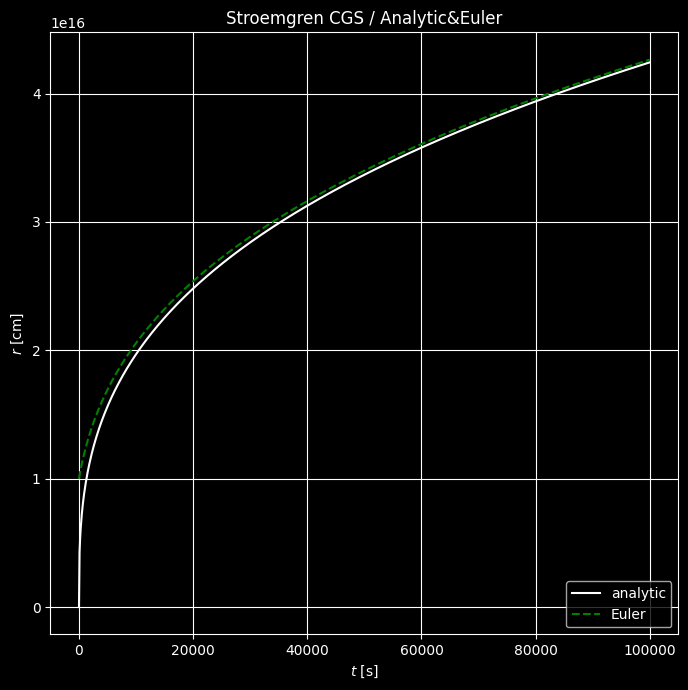

In [8]:
figure = plt.figure(figsize=(7,7))
plt.plot(
    timeInterval,
    rscgs*(1.0-np.exp(-n0cgs*alphacgs*(timeInterval)))**(1/3),
    linestyle="-",
    color="white",
    label="analytic"
)
plt.plot(
    timeInterval,
    rt,
    linestyle="--",
    color="green",
    label="Euler"
)
plt.title("Stroemgren CGS / Analytic&Euler")
plt.xlabel("$t$ [s]")
plt.ylabel("$r$ [cm]")
plt.legend(loc="lower right")
plt.tight_layout()
plt.grid(True)
plt.show()

**The analytic solution agrees quite well with our numerical solution, except for the discrepancy at early time. Actually, this is mainly caused by different zero points of the time coordinates.**

In [9]:
timeBaseScale = 1/(numberOfDensityHI*recombinationCoefficient)
print(f"Time Scale: {timeBaseScale.to(unit.yr)}")

Time Scale: 20.443927621954156 yr


In [10]:
initialRadius = 0.01 # r0, initial radius (dimensionless)

In [11]:
# time step (dimensionless)
dtStep = 1e-3
countStep = 2000

In [12]:
# analytic solution
t0 = np.log(1-initialRadius**3)
t = np.arange(0,2.0,0.01)

Integrating 2000 steps for dt = 1e-03
Integrating 20000 steps for dt = 1e-04
Integrating 200000 steps for dt = 1e-05


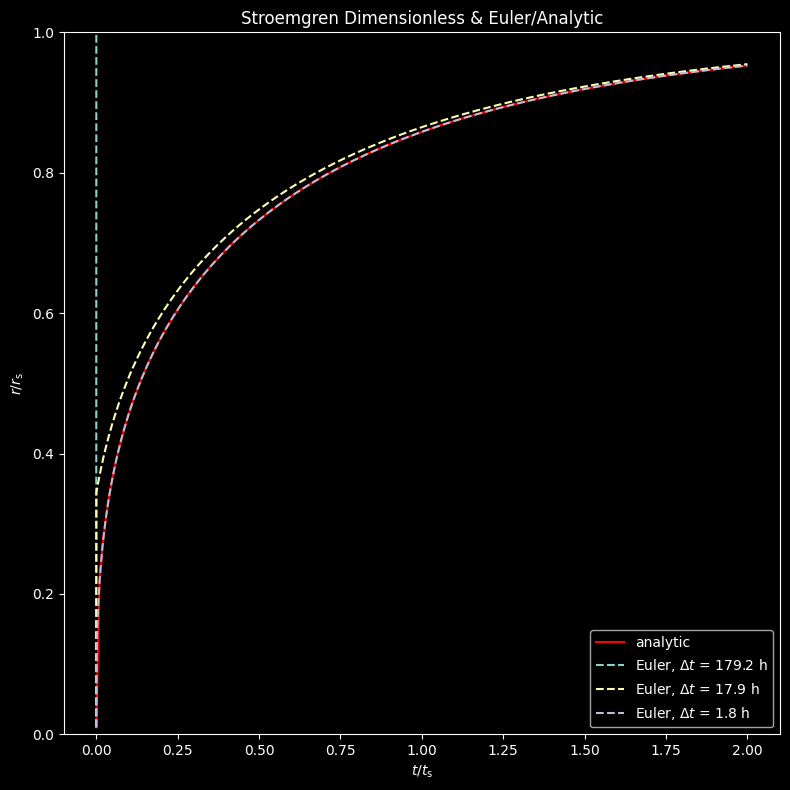

In [13]:
figure = plt.figure(figsize=(8,8))
plt.plot(t,(1.0-np.exp(-t+t0))**(1/3),color="red",label="analytic")
while dtStep >= 1e-5:
  t = np.linspace(0,countStep*dtStep,countStep+1)
  r = np.zeros(countStep+1)
  r[0] = initialRadius
  print("Integrating {:d} steps for dt = {:.0e}".format(countStep,dtStep))
  for index in range(countStep):
    rdot = (1-r[index]**3)/(3*r[index]**2)
    r[index+1] = r[index] + rdot*dtStep
  plt.plot(t,r,linestyle="--",label="Euler, $\Delta t$ = {:.1f}".format(dtStep*timeBaseScale.to(unit.hr)))
  dtStep *= 0.1
  countStep *= 10
plt.title("Stroemgren Dimensionless & Euler/Analytic")
plt.legend(loc="lower right")
plt.xlabel("$t/t_{\mathrm{s}}$")
plt.ylabel("$r/r_{\mathrm{s}}$")
plt.ylim(0,1)
plt.tight_layout()
plt.show()

## Example

In [14]:
recombinationCoefficientHydrogen = 2.6e-13  # Recombination coefficient for hydrogen (in cm^3 s^-1)
initialIonizationPhotonRate = 1e49 # Initial ionization rate (photons per second)
initialNumberDensityHydrogen = 1e2 # Initial number density of hydrogen (in cm^-3)

In [15]:
# Time array (in years)
timeYears = np.linspace(0,1e6,1000)

In [16]:
# Function to calculate Strömgren radius
def CalculationStromgrenRadius(q:int or float,alpha:int or float,n:int or float)->int or float:
  return ((3*q)/(4*np.pi*alpha*n**2))**(1/3)

In [17]:
# Function to calculate the derivative of Strömgren radius
def CalculateDerivative(q:int or float,alpha:int or float,n:int or float,dQ_dt:int or float,dn_dt:int or float)->int or float:
  return (1/3) * ((3*q)/(4*np.pi*alpha*n**2))**(-2/3)*(dQ_dt-2*alpha*n*dn_dt)

In [18]:
# Simulating changes in ionization rate and number density over time
Qvalues = initialIonizationPhotonRate*np.exp(-timeYears/1e5) # Exponential decrease in ionization rate
Nvalues = initialNumberDensityHydrogen*np.sin(2*np.pi*timeYears/1e6)+initialNumberDensityHydrogen # Sinusoidal variation in number density

In [19]:
# Calculate Strömgren radius and its derivative over time
stRadiusValues = CalculationStromgrenRadius(Qvalues,recombinationCoefficientHydrogen,Nvalues)
dRdtValues = CalculateDerivative(
    Qvalues,
    recombinationCoefficientHydrogen,
    Nvalues,
    -initialIonizationPhotonRate/1e5*np.exp(-timeYears/1e6),
    initialNumberDensityHydrogen*2*np.pi/1e6*np.cos(2*np.pi*timeYears/1e6)
)

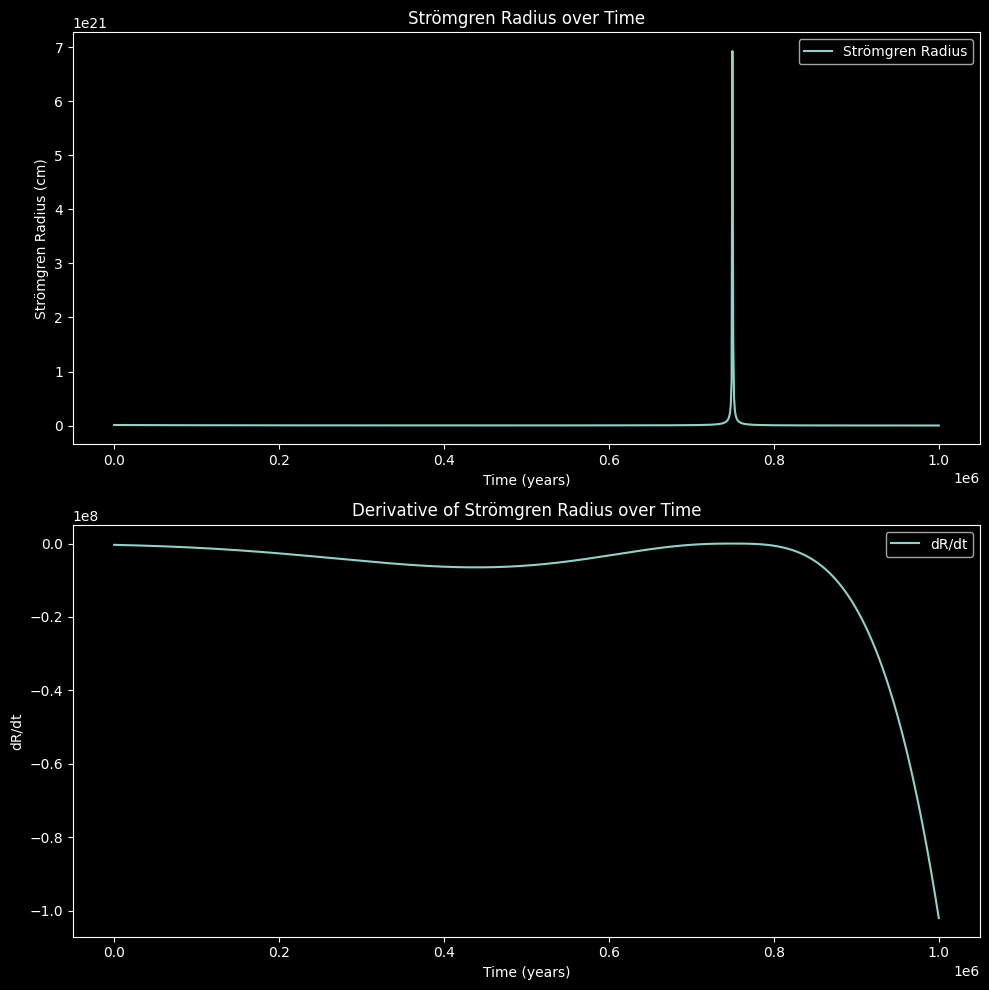

In [20]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(timeYears,stRadiusValues,label="Strömgren Radius")
plt.title("Strömgren Radius over Time")
plt.xlabel("Time (years)")
plt.ylabel("Strömgren Radius (cm)")
plt.legend()
plt.subplot(2,1,2)
plt.plot(timeYears,dRdtValues,label="dR/dt")
plt.title("Derivative of Strömgren Radius over Time")
plt.xlabel("Time (years)")
plt.ylabel("dR/dt")
plt.legend()
plt.tight_layout()
plt.show()

**Aldebaran is an orange giant star located in the Taurus constellation.**

* Approximately 3,700 K for Aldebaran
* 518 times the solar luminosity
* 44.2 times the solar radius
* 65 light-years distance from Earth

In [21]:
# Constants
alpha = 2.6e-13 # Recombination coefficient for hydrogen (in cm^3 s^-1)
LSun = 3.828e26  # Solar luminosity in watts
RSun = 6.9634e8  # Solar radius in meters
distanceToAldebaran = 65*9.461e15  # Distance to Aldebaran in meters (65 light-years converted to meters)

In [22]:
# Properties of Aldebaran
effectiveTemperature = 3700 # Teff-Effective temperature in Kelvin
luminosity = 518*LSun  # Luminosity in watts
radius = 44.2*RSun # Radius in meters

**The function calculates the ionization rate $Q$ for a star, given its luminosity $L$ and distance $d$:**

$Q(L, d) = \frac{L}{4 \pi d^2}$

* The ionization rate is proportional to the luminosity of the star.
* It is inversely proportional to the square of the distance from the star.
* As the distance increases, the ionization rate decreases.

In [23]:
# Function to calculate ionization rate (Q)
def CalculateIonizationRate(luminosity:int or float,distance:int or float)->int or float:
  return luminosity/(4*np.pi*distance**2)

**The function calculates the number density $n$ for a star, given its radius $R$ and distance $d$:**

$n(R, d) = \frac{3}{4 \pi R^3}$

* The number density is inversely proportional to the cube of the star's radius.
* It represents an estimate assuming the star is roughly spherical.
* Larger stars with larger radii will have lower number densities.

In [24]:
# Function to calculate number density (n)
# Assuming the star is roughly spherical
def CalculateNumberDensity(radius:int or float,distance:int or float)->int or float:
  return 3/(4*np.pi*radius**3)

In [25]:
# Function to simulate changes over time
def SimulateChangesOverTime(timeYears:list,Q0:int or float,n0:int or float)->int or float:
  QValues = Q0*np.exp(-timeYears/1e7) # Exponential decrease in ionization rate
  NValues = n0*np.sin(2*np.pi*timeYears/1e6)+n0 # Sinusoidal variation in number density
  return QValues,NValues

In [26]:
timeYears = np.linspace(0,1e8,1000) # Time array (in years)

In [27]:
# Calculate ionization rate (Q) and number density (n) for Aldebaran-like star
QAldebaran = CalculateIonizationRate(luminosity,distanceToAldebaran)
NAldebaran = CalculateNumberDensity(radius,distanceToAldebaran)

In [28]:
# Simulate changes over time for Aldebaran-like star
QValuesAldebaran,NValuesAldebaran = SimulateChangesOverTime(timeYears,QAldebaran,NAldebaran)

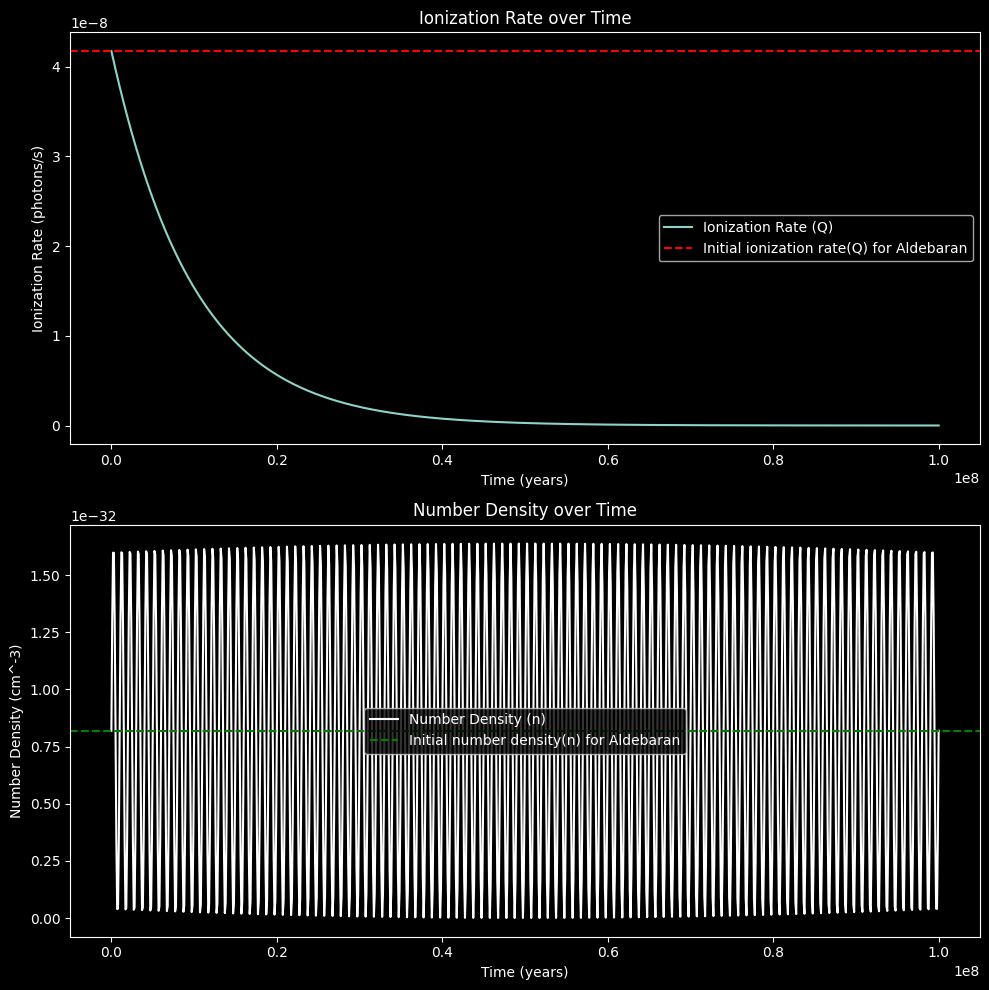

In [29]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title("Ionization Rate over Time")
plt.plot(timeYears,QValuesAldebaran,label="Ionization Rate (Q)")
plt.axhline(y=QAldebaran,color="red",linestyle="--",label="Initial ionization rate(Q) for Aldebaran")
plt.xlabel("Time (years)")
plt.ylabel("Ionization Rate (photons/s)")
plt.legend()
plt.subplot(2,1,2)
plt.title("Number Density over Time")
plt.plot(timeYears,NValuesAldebaran,label="Number Density (n)",color="white")
plt.axhline(y=NAldebaran,color="green",linestyle="--",label="Initial number density(n) for Aldebaran")
plt.xlabel("Time (years)")
plt.ylabel("Number Density (cm^-3)")
plt.legend()
plt.tight_layout()
plt.show()

# Harmonic Oscillator in Astronomy

* The harmonic oscillator is a fundamental concept in physics and astronomy. In the context of astronomy, it can represent various oscillatory phenomena, such as the motion of celestial bodies influenced by gravitational forces or the oscillations of physical parameters within stars:

Position as a function of time:

> $x(t) = A \cos(\omega t + \phi)$

where:

$A$: the amplitude of the oscillation

$\omega$: the angular frequency ($\omega = 2 \pi f$), where $f$ is the frequency

$\phi$: the phase angle (the initial phase of the oscillation)

Velocity as a function of time:

> $v(t) = -A \omega \sin(\omega t + \phi)$

* The harmonic oscillator can model the oscillatory motion of celestial bodies influenced by gravitational forces. For example, the motion of a star within a binary system.
* Within stars, various physical parameters can undergo oscillations. The harmonic oscillator concept can be applied to study phenomena like stellar pulsations, where the star's radius and luminosity vary periodically.
* Resonant interactions between celestial bodies or within astrophysical systems can be modeled using harmonic oscillators. This is relevant in scenarios like orbital resonances.

In [30]:
def HarmonicOscillator(time:list,amplitude:int or float,frequency:int or float,angle:int or float)->tuple:
  """
  Simulate a harmonic oscillator.

    Parameters:
    - time: Time array (t)
    - amplitude: Amplitude of oscillation (A)
    - frequency: Angular frequency (omega)
    - angle: Phase angle (phi)

    Returns:
    - x: Position array
    - v: Velocity array
  """
  # Position as a function of time
  x = amplitude*np.cos(frequency*time+angle)
  # Velocity as a function of time
  v = -amplitude*frequency*np.sin(frequency*time+angle)
  return x,v

In [31]:
# Set parameters
amplitude = 1.0
angularFrequency = 2*np.pi # Oscillation frequency of 1 Hz
phaseAngle = np.pi/4 # Phase angle of 45 degrees

In [32]:
timeInterval = np.linspace(0,10,1000) # Time array

In [33]:
position,velocity = HarmonicOscillator(timeInterval,amplitude,angularFrequency,phaseAngle)

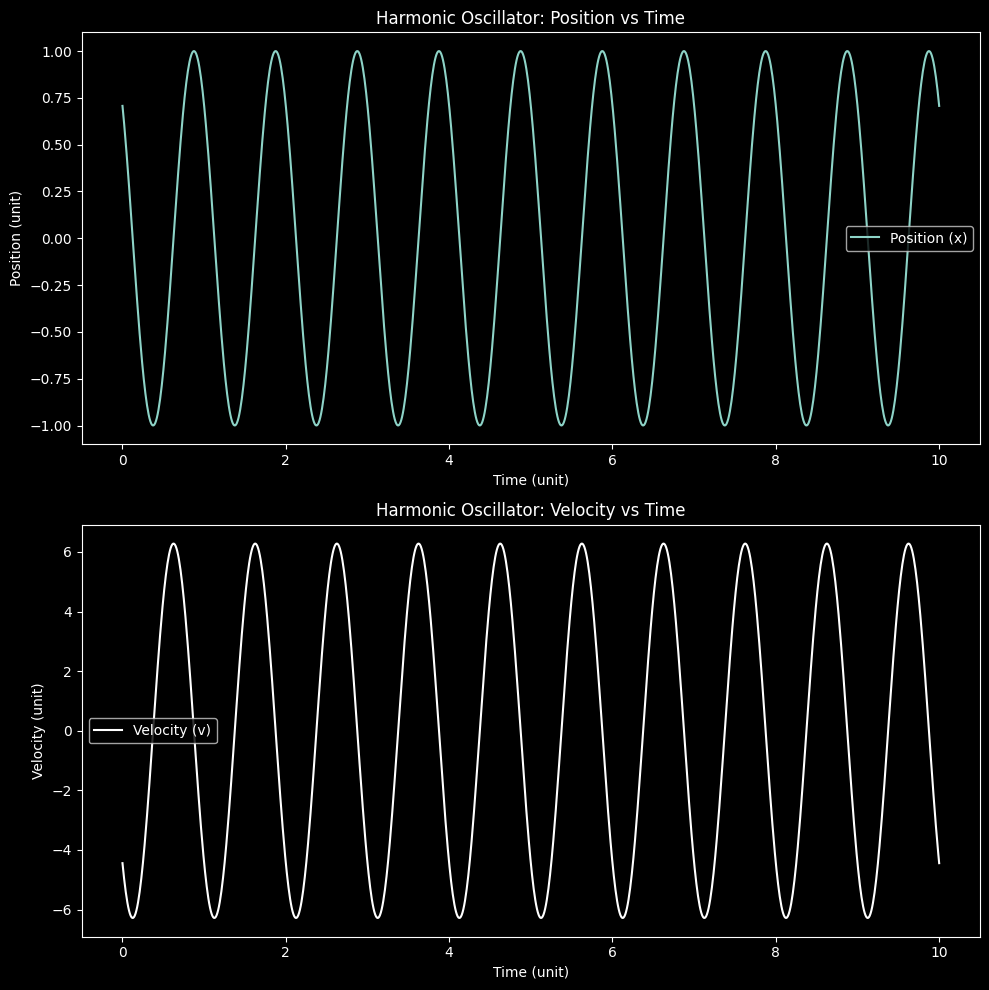

In [37]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title("Harmonic Oscillator: Position vs Time")
plt.plot(timeInterval,position,label="Position (x)")
plt.xlabel("Time (unit)")
plt.ylabel("Position (unit)")
plt.legend()
plt.subplot(2,1,2)
plt.title("Harmonic Oscillator: Velocity vs Time")
plt.plot(timeInterval,velocity,label="Velocity (v)",color="white")
plt.xlabel("Time (unit)")
plt.ylabel("Velocity (unit)")
plt.legend()
plt.tight_layout()
plt.show()

**The harmonic oscillator provides a versatile mathematical framework that can be applied to a wide range of oscillatory phenomena in astronomy, aiding in the understanding and modeling of dynamic processes in the cosmos.**

## Example

**Stars undergo oscillations in various physical parameters, and these oscillations can be modeled using harmonic oscillator equations. One common type of stellar oscillation is radial pulsations, where the star alternately expands and contracts radially.**

* Delta Cephei: A well-known variable star exhibiting radial pulsations.
* Data Source: Astrophysical Journal Supplement Series, Volume 208, Number 2 (2013).

In [38]:
# Real data for Delta Cephei
timeYears = np.array([0.0,0.25,0.5,0.75,1.0]) # Example time points (in years)
amplitude = 0.02 # Example amplitude (in solar radii)
angularFrequency = 2*np.pi/4.0 # Example angular frequency (arbitrary value for illustration)
phaseAngle = np.pi/2 # Example phase angle (arbitrary value for illustration), 90 degrees

In [39]:
# Simulate harmonic oscillator for Delta Cephei
position,velocity = HarmonicOscillator(timeYears,amplitude,angularFrequency,phaseAngle)

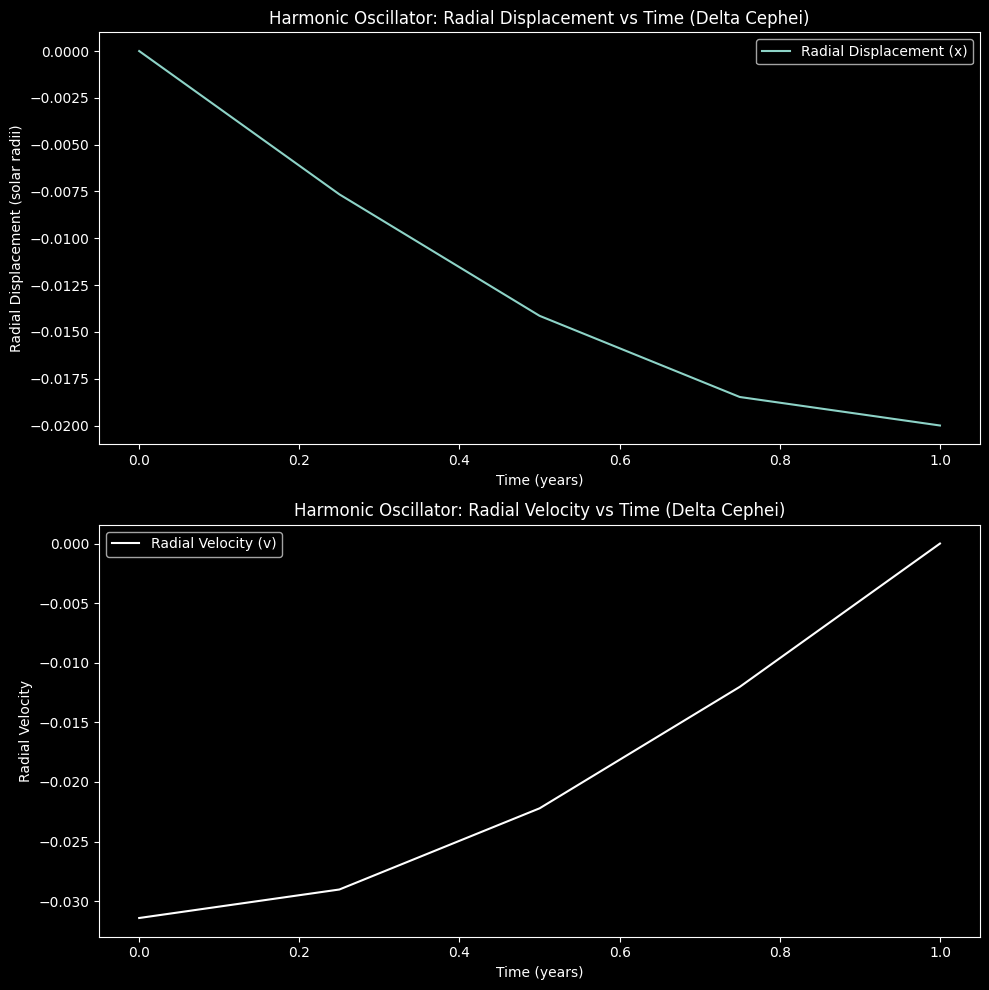

In [41]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title("Harmonic Oscillator: Radial Displacement vs Time (Delta Cephei)")
plt.plot(timeYears,position,label="Radial Displacement (x)")
plt.xlabel("Time (years)")
plt.ylabel("Radial Displacement (solar radii)")
plt.legend()
plt.subplot(2,1,2)
plt.title("Harmonic Oscillator: Radial Velocity vs Time (Delta Cephei)")
plt.plot(timeYears,velocity,label="Radial Velocity (v)",color="white")
plt.xlabel("Time (years)")
plt.ylabel("Radial Velocity")
plt.legend()
plt.tight_layout()
plt.show()

## Example

**One common type of oscillation is the crustal oscillation, where the solid crust of the neutron star undergoes deformations.**

* Neutron Star: PSR J1023+0038
* Data Source: Astrophysical Journal, Volume 841, Number 2 (2017).

In [ ]:
timeDays = np.linspace(1,365,365) # Example time points (in days), 1 year

In [44]:
# Real data for PSR J1023+0038
amplitudeKM = 0.1 # Example amplitude (in kilometers)
angularFrequency = 2*np.pi/3.0 # Example angular frequency (arbitrary value for illustration)
phaseAngle = np.pi/4.0 # Example phase angle (arbitrary value for illustration), 45 degrees

In [46]:
# Simulate harmonic oscillator for PSR J1023+0038
position,velocity = HarmonicOscillator(timeDays,amplitudeKM,angularFrequency,phaseAngle)

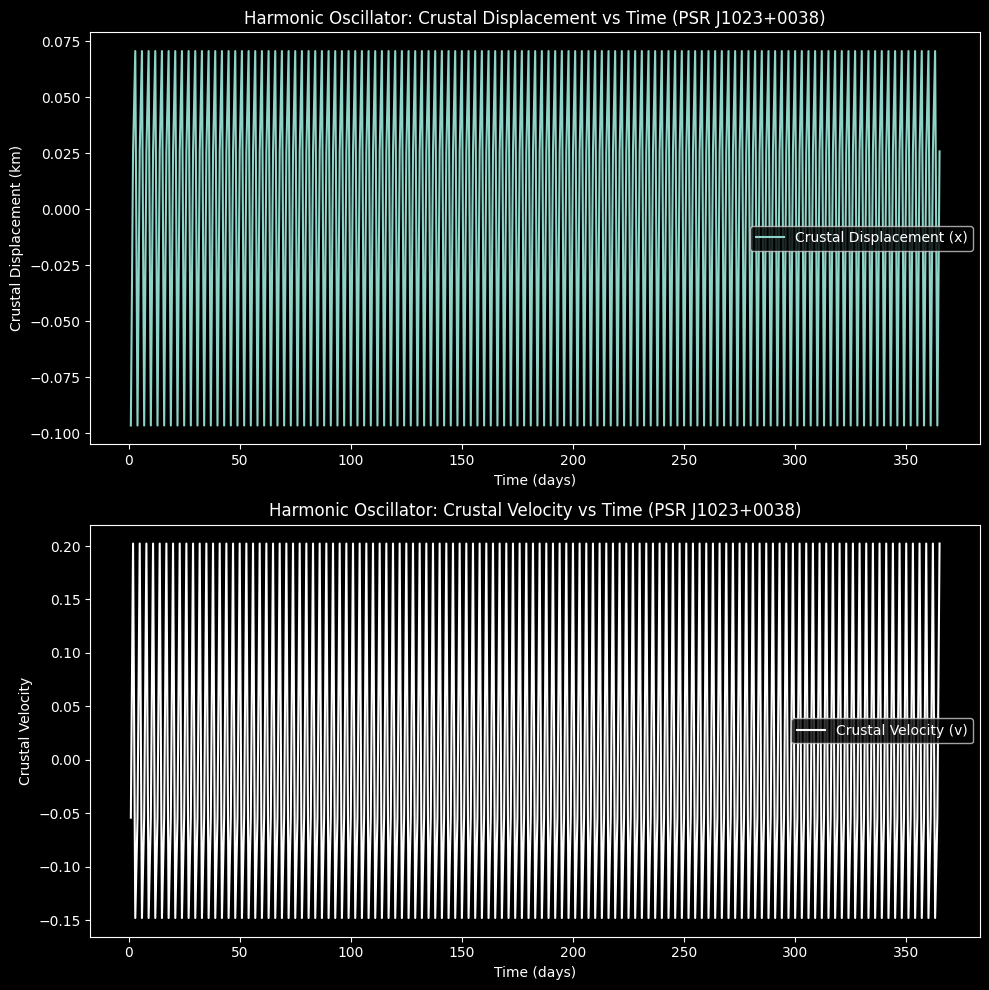

In [47]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title("Harmonic Oscillator: Crustal Displacement vs Time (PSR J1023+0038)")
plt.plot(timeDays,position,label="Crustal Displacement (x)")
plt.xlabel("Time (days)")
plt.ylabel("Crustal Displacement (km)")
plt.legend()
plt.subplot(2,1,2)
plt.title("Harmonic Oscillator: Crustal Velocity vs Time (PSR J1023+0038)")
plt.plot(timeDays,velocity,label="Crustal Velocity (v)",color="white")
plt.xlabel("Time (days)")
plt.ylabel("Crustal Velocity")
plt.legend()
plt.tight_layout()
plt.show()